# 🔍 Sobre el desafío

###  Descripción del Desafío

El objetivo de este proyecto es desarrollar modelos predictivos capaces de identificar clientes con alta probabilidad de cancelar los servicios de **Telecom X**.

---

### Objetivos principales
- Realizar el preprocesamiento de los datos: tratamiento de valores, codificación de variables y normalización.  
- Analizar correlaciones y seleccionar variables relevantes para el modelo.  
- Entrenar y evaluar distintos modelos de clasificación.  
- Medir el rendimiento mediante métricas adecuadas.  
- Interpretar la importancia de las variables y extraer conclusiones estratégicas.  

---

### Alcance del trabajo
- **Preparación de datos:** limpieza, transformación y balanceo de clases.  
- **Modelado:** comparación de al menos dos algoritmos de clasificación.  
- **Evaluación:** análisis de métricas y ajuste de hiperparámetros si es necesario.  
- **Resultados:** identificación de factores clave en la cancelación de clientes.  

---

### Direccionario Diccionario de datos
- `customerID:` número de identificación único de cada cliente
- `Churn:` si el cliente dejó o no la empresa
-`gender:` género (masculino y femenino)
-`SeniorCitizen:` información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner:` si el cliente tiene o no una pareja
- `Dependents:` si el cliente tiene o no dependientes
- `tenure:` meses de contrato del cliente
- `PhoneService:` suscripción al servicio telefónico
- `MultipleLines:` suscripción a más de una línea telefónica
- `InternetService:` suscripción a un proveedor de internet
- `OnlineSecurity:` suscripción adicional de seguridad en línea
- `OnlineBackup:` suscripción adicional de respaldo en línea
- `DeviceProtection:` suscripción adicional de protección del dispositivo
- `TechSupport:` suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV:` suscripción de televisión por cable
- `StreamingMovies:` suscripción de streaming de películas
-` Contract:` tipo de contrato
- `PaperlessBilling:` si el cliente prefiere recibir la factura en línea
- `PaymentMethod:` forma de pago
- `Charges.Monthly:` total de todos los servicios del cliente por mes
- `Charges.Day:`total de todos los servicios del cliente por día

# 📌 Extracción de los datos

In [1]:
import pandas as  pd
import warnings
warnings.filterwarnings('ignore')

df= pd.read_csv('/content/df_limpo.csv')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


#📊 Análisis exploratorio inicial

In [2]:
print("Shape:", df.shape)
print("\nTipos de datos:")
print(df.info())
print("\nEstadísticas Variables númericas:")
display(df.describe())
print("\nEstadísticas variables categóricas:")
display(df.describe(include='O'))

Shape: (7043, 22)

Tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.Tech

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total
count,7043.000000,7043.000000,7032.000000,7043.000000,7032.000000
mean,0.162147,32.371149,2.159879,64.761692,2283.300441
std,0.368612,24.559481,1.006217,30.090047,2266.771362
min,0.000000,0.000000,0.460000,18.250000,18.800000
25%,0.000000,9.000000,1.207500,35.500000,401.450000
50%,0.000000,29.000000,2.350000,70.350000,1397.475000
75%,0.000000,55.000000,3.010000,89.850000,3794.737500
max,1.000000,72.000000,4.050000,118.750000,8684.800000



Estadísticas variables categóricas:


,customerID,Churn,customer.gender,customer.Partner,customer.Dependents,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,5174,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


**OBSERVACIONES:**



---



+ El dataset se encuentra completo y estructurado, sin la existencia de valores faltantes o problemas de tipo de datos.

+ Existe un desbalance en la variable de respuesta Churn(abandono).

+ Se observa una posible relación entre tipo de contrato y abandono.

+ Las variables categóricas como tipo_internet, metodo_pago y los servicios contratados ofrecen información valiosa para identificar patrones de cancelación.

+ Se procedera a eliminar la variable customerID

+ Se procedera con la codificación de las variables categóricas para continuar con el análisis correlacional y la construcción de los modelos.


###Distribución de la variable de respuesta Churn (abandono)

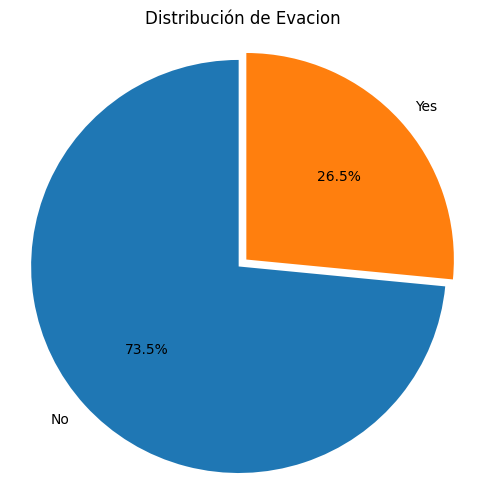

In [3]:
import matplotlib.pyplot as plt

#Grafico de torta para ver la distribucion de la columna Churn
counts = df['Churn'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, explode=(0.05,0))
plt.title('Distribución de Evacion')
plt.axis('equal')
plt.show()

**OBSERVACIONES**


---



+ Se visualiza un desbalance de clases: la mayoría de los clientes no han cancelado. Esto podría influir en los modelos, por lo que será necesario realizar un balence en los datos.

# 🛠️ Preparación de los Datos

In [4]:
#Eliminar la columna customerID
df = df.drop(columns=['customerID'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   object 
 1   customer.gender            7043 non-null   object 
 2   customer.SeniorCitizen     7043 non-null   int64  
 3   customer.Partner           7043 non-null   object 
 4   customer.Dependents        7043 non-null   object 
 5   customer.tenure            7043 non-null   int64  
 6   phone.PhoneService         7043 non-null   object 
 7   phone.MultipleLines        7043 non-null   object 
 8   internet.InternetService   7043 non-null   object 
 9   internet.OnlineSecurity    7043 non-null   object 
 10  internet.OnlineBackup      7043 non-null   object 
 11  internet.DeviceProtection  7043 non-null   object 
 12  internet.TechSupport       7043 non-null   object 
 13  internet.StreamingTV       7043 non-null   objec

**OBSERVACIONES**


---


Se observan variables de tipo object por lo que se deberan modificar para que sean compatibles con los modelos de ML.

In [6]:
#Creamos una copia del df
df_copy = df.copy()


In [7]:
#Agrupar "No internet service" como "No"
cols= ['internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies']

for col in cols:
  df_copy[col] = df_copy[col].replace('No internet service', 'No')

**OBSERVACIONES**


---

Se agrupan todas las respuestas que indican que el cliente **no tiene servicio de Internet** bajo la categoría "No".  
Lo que simplificara las variables binarias y unifica la codificación, evitando valores redundantes como "No internet service" que representan lo mismo que "No".

## Codificación de variables categóricas (One-Hot Encoding)

In [8]:
# Detección automática de columnas
col_numericas = df_copy.select_dtypes(include=['int64', 'float64']).columns.tolist()
col_categoricas = df_copy.select_dtypes(include=['object']).columns.tolist()

# Dentro de las categóricas, identificar las binarias (máximo 2 valores únicos)
col_binarias = [col for col in col_categoricas if df_copy[col].nunique(dropna=False) <= 2]

# El resto de categóricas (no binarias)
col_categoricas_no_binarias = list(set(col_categoricas) - set(col_binarias))

print(f'Las columnas numericas son: {col_numericas}')
print(f'Las columnas categoricas binarias son: {col_binarias}')
print(f'Las columnas categoricas con multiples opciones son: {col_categoricas_no_binarias}')

Las columnas numericas son: ['customer.SeniorCitizen', 'customer.tenure', 'Total.Day', 'account.Charges.Monthly', 'account.Charges.Total']
Las columnas categoricas binarias son: ['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.PaperlessBilling']
Las columnas categoricas con multiples opciones son: ['phone.MultipleLines', 'account.PaymentMethod', 'account.Contract', 'internet.InternetService']


In [9]:
#Transformando columnas categoricas binarias
df_copy[col_binarias] = df_copy[col_binarias].replace({'No' : 0, 'Yes': 1})

df_copy['customer.gender'] = df_copy['customer.gender'].replace({'Male': 0, 'Female': 1})
df_copy

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0,1,0,1,1,9,1,No,DSL,0,...,0,1,1,0,One year,1,Mailed check,2.20,65.60,593.30
1,0,0,0,0,0,9,1,Yes,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,2.01,59.90,542.40
2,1,0,0,0,0,4,1,No,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,2.34,73.90,280.85
3,1,0,1,1,0,13,1,No,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,3.17,98.00,1237.85
4,1,1,1,1,0,3,1,No,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,2.97,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,0,0,13,1,No,DSL,1,...,0,1,0,0,One year,0,Mailed check,1.90,55.15,742.90
7039,1,0,0,1,0,22,1,Yes,Fiber optic,0,...,0,0,0,1,Month-to-month,1,Electronic check,2.84,85.10,1873.70
7040,0,0,0,0,0,2,1,No,DSL,0,...,0,0,0,0,Month-to-month,1,Mailed check,1.55,50.30,92.75
7041,0,0,0,1,1,67,1,No,DSL,1,...,1,1,0,1,Two year,0,Mailed check,2.30,67.85,4627.65


In [10]:
df_encoded = pd.get_dummies(df_copy, columns=col_categoricas_no_binarias, drop_first=True,  dtype=int)
df_encoded

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,...,account.Charges.Total,phone.MultipleLines_No phone service,phone.MultipleLines_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check,account.Contract_One year,account.Contract_Two year,internet.InternetService_Fiber optic,internet.InternetService_No
0,0,1,0,1,1,9,1,0,1,0,...,593.30,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,9,1,0,0,0,...,542.40,0,1,0,0,1,0,0,0,0
2,1,0,0,0,0,4,1,0,0,1,...,280.85,0,0,0,1,0,0,0,1,0
3,1,0,1,1,0,13,1,0,1,1,...,1237.85,0,0,0,1,0,0,0,1,0
4,1,1,1,1,0,3,1,0,0,0,...,267.40,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,0,0,13,1,1,0,0,...,742.90,0,0,0,0,1,1,0,0,0
7039,1,0,0,1,0,22,1,0,0,0,...,1873.70,0,1,0,1,0,0,0,1,0
7040,0,0,0,0,0,2,1,0,1,0,...,92.75,0,0,0,0,1,0,0,0,0
7041,0,0,0,1,1,67,1,1,0,1,...,4627.65,0,0,0,0,1,0,1,0,0


In [11]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Churn                                          7043 non-null   int64  
 1   customer.gender                                7043 non-null   int64  
 2   customer.SeniorCitizen                         7043 non-null   int64  
 3   customer.Partner                               7043 non-null   int64  
 4   customer.Dependents                            7043 non-null   int64  
 5   customer.tenure                                7043 non-null   int64  
 6   phone.PhoneService                             7043 non-null   int64  
 7   internet.OnlineSecurity                        7043 non-null   int64  
 8   internet.OnlineBackup                          7043 non-null   int64  
 9   internet.DeviceProtection                      7043 

**OBSERVACIONES**


---


🔹 **Identificación y transformación de variables**

Primero se analizaron todas las columnas del dataset para clasificarlas según su tipo:

- **Numéricas**: variables con valores continuos o discretos.  
- **Binarias**: variables con únicamente dos posibles categorías.  
- **Categóricas**: variables con más de dos categorías.

---

🔹 **Transformación de variables binarias**
Las variables binarias no se transformaron con `get_dummies`.  
En su lugar, se mapearon directamente a valores numéricos:

- **Yes → 1**  
- **No → 0**

- **Female → 1**
- **Male → 0**

De esta manera se simplifica su interpretación y se evita la creación de columnas adicionales.

---

🔹 **Transformación de variables categóricas**
Las variables categóricas con más de dos posibles valores se transformaron mediante **One-Hot Encoding** con la función `pd.get_dummies`.
Esto genera nuevas columnas (dummies), donde cada categoría toma el valor 1 si el registro pertenece a esa clase y 0 en caso contrario.

##  Tratamiento de valores nulos

In [12]:
df_encoded.isnull().sum()

,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
internet.OnlineSecurity,0
internet.OnlineBackup,0
internet.DeviceProtection,0


In [13]:
 #Elimina filas con valores nulos en las columnas especificadas
df_encoded = df_encoded.dropna(subset=['Total.Day', 'account.Charges.Total'])

**OBSERVACIONES**


---
En este paso se eliminaron las filas que contenían **valores nulos** en las columnas `Total.Day` y `account.Charges.Total`.  
Asegurando que el modelo no reciba datos incompletos que puedan afectar el entrenamiento y la calidad de las predicciones.


## Normalizando los datos


In [14]:
#normalización Min-Max
from sklearn.preprocessing import MinMaxScaler

normalizacion = MinMaxScaler()
df_encoded[col_numericas] = normalizacion.fit_transform(df_encoded[col_numericas])
df_encoded

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,...,account.Charges.Total,phone.MultipleLines_No phone service,phone.MultipleLines_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check,account.Contract_One year,account.Contract_Two year,internet.InternetService_Fiber optic,internet.InternetService_No
0,0,1,0.0,1,1,0.112676,1,0,1,0,...,0.066294,0,0,0,0,1,1,0,0,0
1,0,0,0.0,0,0,0.112676,1,0,0,0,...,0.060420,0,1,0,0,1,0,0,0,0
2,1,0,0.0,0,0,0.042254,1,0,0,1,...,0.030239,0,0,0,1,0,0,0,1,0
3,1,0,1.0,1,0,0.169014,1,0,1,1,...,0.140670,0,0,0,1,0,0,0,1,0
4,1,1,1.0,1,0,0.028169,1,0,0,0,...,0.028687,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0.0,0,0,0.169014,1,1,0,0,...,0.083556,0,0,0,0,1,1,0,0,0
7039,1,0,0.0,1,0,0.295775,1,0,0,0,...,0.214043,0,1,0,1,0,0,0,1,0
7040,0,0,0.0,0,0,0.014085,1,0,1,0,...,0.008533,0,0,0,0,1,0,0,0,0
7041,0,0,0.0,1,1,0.929577,1,1,0,1,...,0.531831,0,0,0,0,1,0,1,0,0


**OBSERVACIONES**


---
Se aplicó **normalización Min-Max** a las variables numéricas, escalando sus valores al rango [0, 1].  
Permitiendo que todas las variables tengan la misma escala, evitando que aquellas con valores más grandes dominen el entrenamiento del modelo y mejorando la convergencia de los algoritmos.


## Verificación de la Proporción de Cancelación (Churn)

In [15]:
#Evalúa si existe un desbalance entre las clases,
df_encoded.Churn.value_counts()

,count
Churn,
0,5163
1,1869


**OBSERVACIONES**


---
Se observo la existencia de un desbalance entre las clases de la variable objetivo `Churn`. Será necesario aplicar técnicas de balanceo durante el entrenamiento del modelo.


## Analisis de correlacion

In [16]:
#Analizando la correlacion
corr = df_encoded.corr()

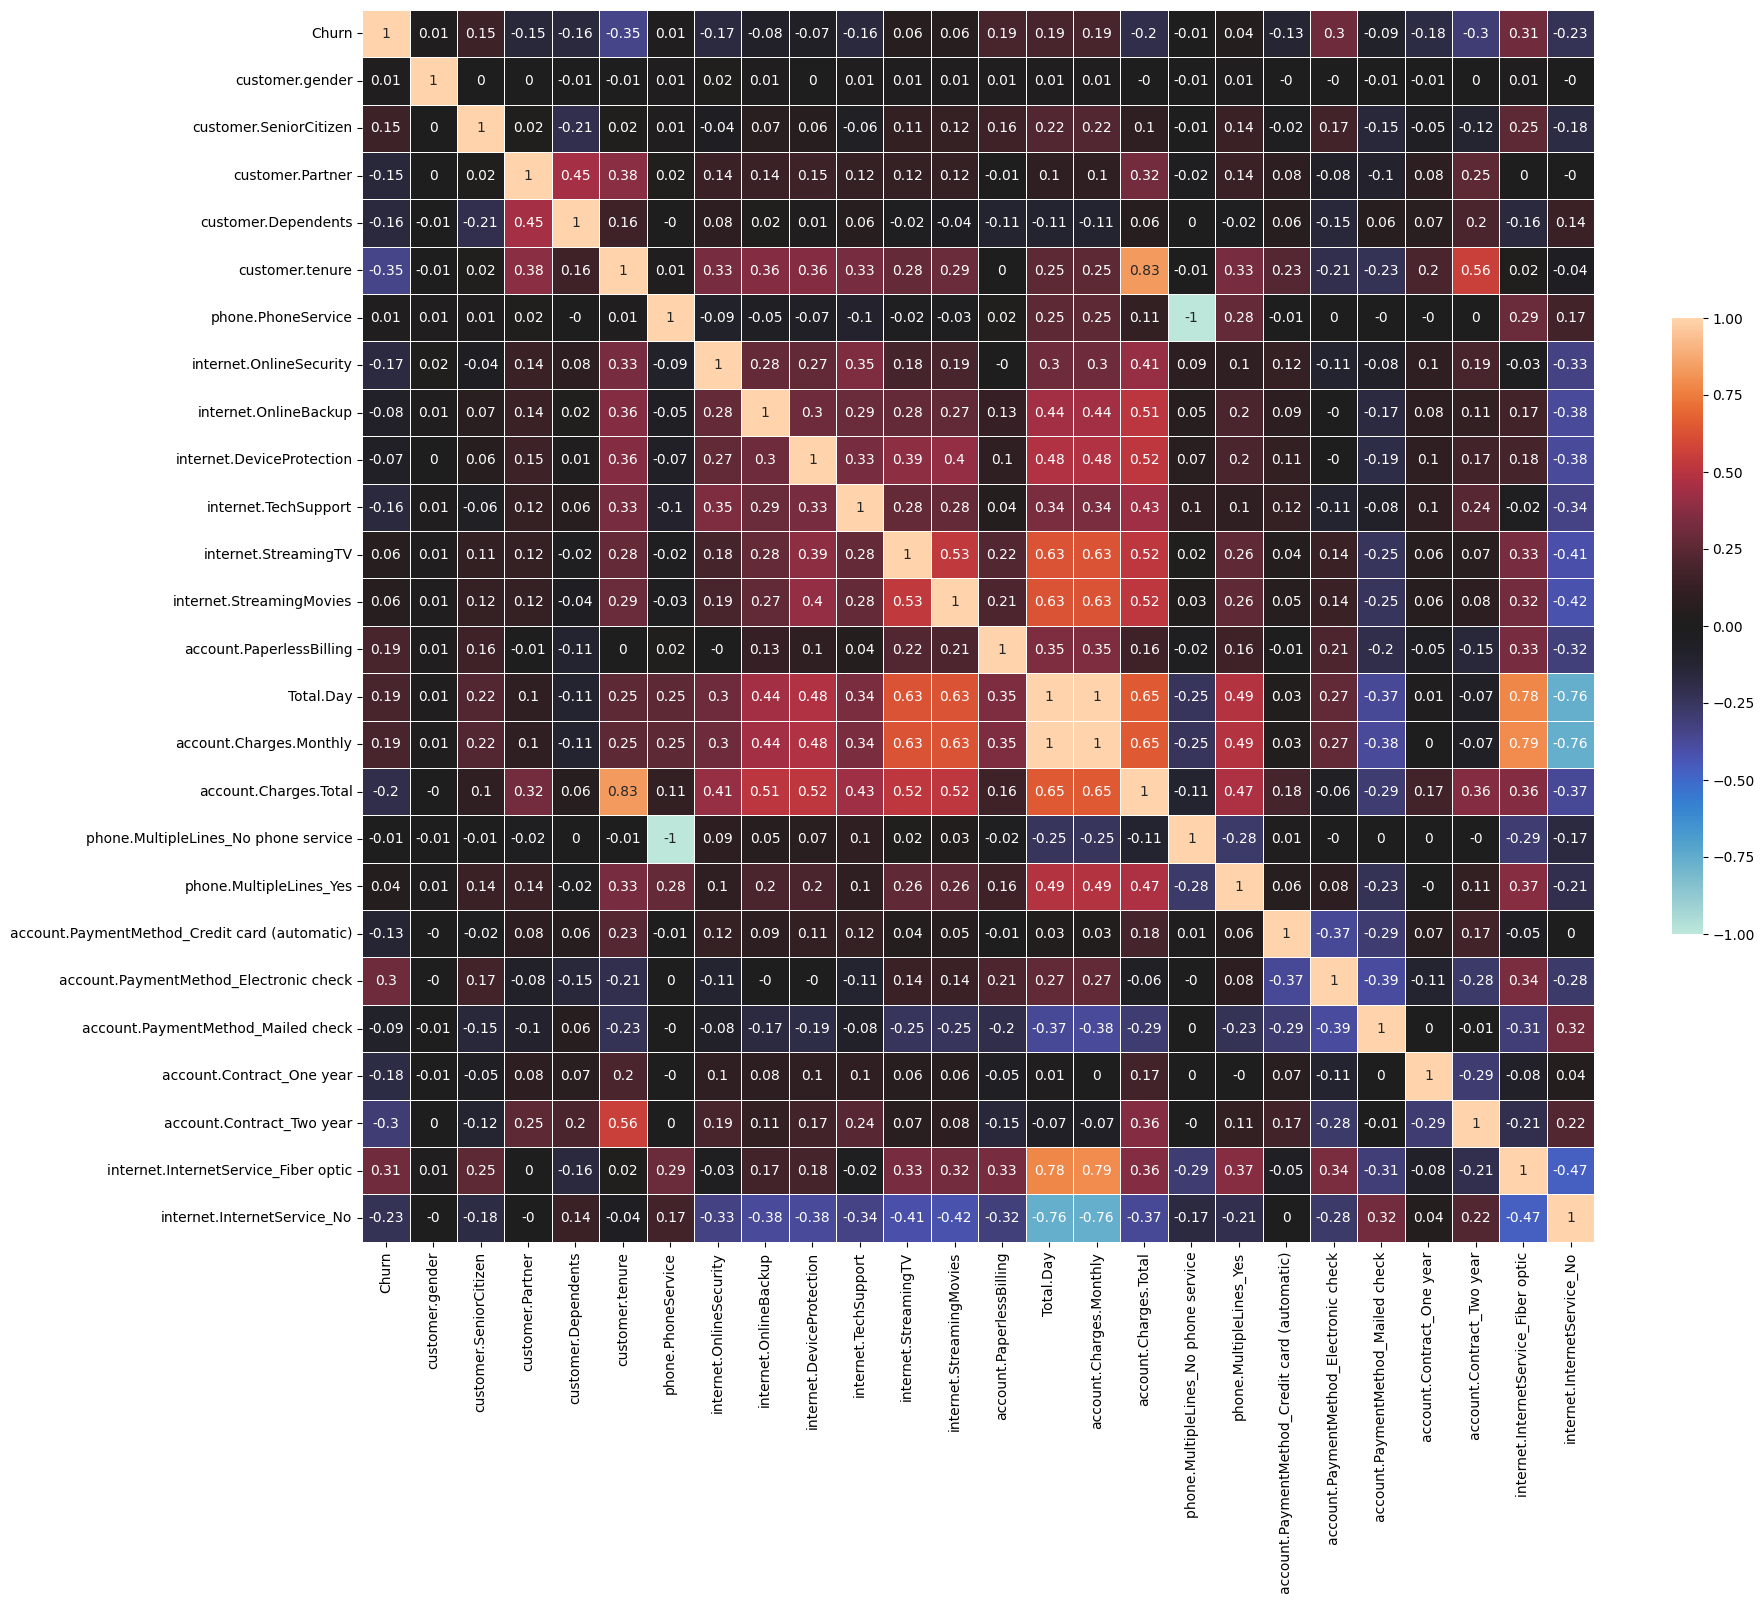

In [17]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

## Definición de variables explicativas y variable objetivo

In [18]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# 🧩 Calcular el VIF

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [20]:
#Se excluye la variable objetivo
X = df_encoded.drop(columns=['Churn'])

#Se añade una constante
X_const = add_constant(X)

In [21]:
#Calcular VIF

#DataFrame vacio para guardar los datos
vif_data = pd.DataFrame()

#Guardar los nombres de las columnas (features) de X_cons
vif_data["feature"] = X_const.columns

#Calculas el VIF para cada columna i
vif_data["VIF"] = [
    variance_inflation_factor(X_const.values, i)
    for i in range(X_const.shape[1])
    ]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))


,feature,VIF
6,phone.PhoneService,inf
17,phone.MultipleLines_No phone service,inf
15,account.Charges.Monthly,926.499017
24,internet.InternetService_Fiber optic,148.494561
14,Total.Day,133.749918
25,internet.InternetService_No,104.215398
12,internet.StreamingMovies,24.156508
11,internet.StreamingTV,24.066327
16,account.Charges.Total,10.868340
5,customer.tenure,7.613277


**OBSERVACIONES**


---
🔹 **Análisis de Multicolinealidad (VIF)**

Se calculó el **Variance Inflation Factor (VIF)** para todas las variables explicativas con el fin de detectar **multicolinealidad** en el dataset.

Observaciones principales:

1. **Variables con VIF extremadamente alto o infinito**  
   - `phone.PhoneService` y `phone.MultipleLines_No phone service` tienen VIF = inf.  
     → Indica que estas dos variables están perfectamente colineales, probablemente porque representan la misma información de forma redundante.  
   - `account.Charges.Monthly` también presenta VIF muy alto (≈ 916), mostrando fuerte dependencia con otras variables relacionadas a cargos o facturación (`Total.Day`, `account.Charges.Total`).  

2. **Variables con VIF moderado-alto**  
   - Variables como `internet.InternetService_Fiber optic` (≈148), `Total.Day` (≈134) y `internet.InternetService_No` (≈104) muestran colinealidad significativa, lo que puede afectar la estabilidad de algunos modelos lineales.  

3. **Variables con VIF bajo**  
   - La mayoría de las demás variables tienen VIF < 10, lo que indica que no presentan problemas graves de multicolinealidad y pueden incluirse en el modelo sin riesgo significativo.  


- Se prcedera a eliminar las variables altamente colineales antes de entrenar modelos para evitar que influyan de manera desproporcionada en los coeficientes y en la interpretación de los resultados.


In [22]:
#copiar X original para no modificar el original
X_const_reduced = X_const.copy()

# Eliminar columnas problemáticas
cols_to_drop = ['phone.MultipleLines_No phone service',
                'Total.Day',
                'account.Charges.Monthly',
                'internet.InternetService_No',
                ]

X_const_reduced.drop(columns=cols_to_drop, inplace=True)

In [23]:
#Recalcular VIF

vif_data = pd.DataFrame()
vif_data["feature"] = X_const_reduced.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_const_reduced.values, i)
    for i in range(X_const_reduced.shape[1])
    ]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))

,feature,VIF
0,const,26.531115
14,account.Charges.Total,10.550057
5,customer.tenure,7.323800
20,account.Contract_Two year,2.495815
21,internet.InternetService_Fiber optic,2.266975
17,account.PaymentMethod_Electronic check,1.968547
18,account.PaymentMethod_Mailed check,1.830957
12,internet.StreamingMovies,1.731273
11,internet.StreamingTV,1.717205
19,account.Contract_One year,1.576304


**OBSERVACIONES**


---
🔹 **Análisis de Multicolinealidad (VIF) — Resultado actualizado**

Después de eliminar las variables altamente colineales, se recalculó el VIF para todas las variables explicativas.

**Observaciones principales:**

1. **Reducción significativa de colinealidad**  
   - Las variables que antes tenían VIF extremadamente alto (`phone.PhoneService`, `phone.MultipleLines_No phone service`, `account.Charges.Monthly`) ahora presentan valores muy bajos (< 2 en la mayoría de los casos).  
   - Esto indica que se eliminó la colinealidad fuerte y las variables restantes están menos correlacionadas entre sí.

2. **Variables con VIF todavía moderado**  
   - `account.Charges.Total` = 10.55 → muestra cierta correlación con otras variables de facturación, pero ya no es problemática.  
   - `const` = 26.53 → es normal que la constante tenga VIF alto, no representa un problema.

3. **Resto de las variables**  
   - Todas las demás variables tienen VIF < 8, lo que indica que ya no existe riesgo relevante de multicolinealidad.  
   - Esto mejora la estabilidad de modelos lineales y la interpretación de los coeficientes.



- Con este conjunto de variables, se puede proceder al entrenamiento de modelos de regresión logística o lineal **sin preocupaciones por multicolinealidad severa**.  



# ↔️ Separación de Datos

In [24]:
#Dividiendo los datos de entranimento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_const_reduced, y, test_size=0.30, stratify=y, random_state=5)

# ⚖️ Balanceo de Clases

In [25]:
#SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.
from imblearn.over_sampling import SMOTE

oversampling = SMOTE()
X_train_balanceada, y_train_balanceada = oversampling.fit_resample(X_train,y_train)
y_train_balanceada.value_counts(normalize = True)

,proportion
Churn,
1,0.5
0,0.5


# ⚙️Creación de Modelos Predictivos

## Modelo 1 - Regresión Logística

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)
lr.fit(X_train_balanceada, y_train_balanceada)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [27]:
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
# Precisión
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# Matriz de confusión
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Reporte de clasificación (precision, recall, f1-score)
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# AUC-ROC
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_lr))


Accuracy: 0.7497630331753554
Confusion Matrix:
 [[1137  412]
 [ 116  445]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1549
           1       0.52      0.79      0.63       561

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.80      0.75      0.76      2110

ROC-AUC Score: 0.836609554321171


**OBSERVACIONES**

---
1️⃣ **Accuracy**
- El modelo clasifica correctamente el 74% de los clientes (Accuracy = 0.742).  
- Aunque es un buen valor global, en problemas con clases desbalanceadas no refleja completamente la capacidad de identificar churners (clientes que cancelan).

2️⃣ **Matriz de Confusión**

|                  | Predicción No Churn (0) | Predicción Churn (1) |
|------------------|------------------------|--------------------|
| **Real No Churn (0)** | 1123                   | 426                |
| **Real Churn (1)**    | 118                    | 443                |

- Verdaderos positivos (TP): 443 → clientes que cancelaron y fueron correctamente predichos.  
- Falsos negativos (FN): 118 → clientes que cancelaron pero fueron clasificados como no cancelarán.  
- Verdaderos negativos (TN): 1123 → clientes no cancelaron y fueron correctamente clasificados.  
- Falsos positivos (FP): 426 → clientes que no cancelaron pero el modelo predijo que sí.  

🔹 Observación: el modelo **detecta bien a los churners** (recall alto) pero todavía genera **falsos positivos** que podrían implicar acciones de retención innecesarias.

3️⃣ **Precision, Recall y F1-score**

- **Clase 0 (No Churn)**  
  - Precision = 0.90 → de los clientes predichos como “no cancelan”, el 90% realmente no lo hace.  
  - Recall = 0.72 → identifica correctamente el 72% de los clientes que no cancelan.  

- **Clase 1 (Churn)**  
  - Precision = 0.51 → de los clientes predichos como churners, solo el 51% realmente cancela.  
  - Recall = 0.79 → identifica correctamente el 79% de los clientes que realmente cancelan.  
  - F1-score = 0.62 → combina precision y recall; indica equilibrio moderado entre falsos positivos y falsos negativos.

- **Macro promedio**: 0.71 → refleja desempeño promedio entre ambas clases sin ponderar tamaño.  
- **Weighted promedio**: 0.76 → pondera según tamaño de las clases; refleja mejor la performance general.

4️⃣ **ROC-AUC Score**
- ROC-AUC = 0.836 → buen desempeño general para diferenciar entre churners y no churners.  
- Un valor > 0.8 indica que el modelo puede discriminar correctamente la mayoría de los casos.

🔹 **Conclusiones estratégicas**

1. El modelo es eficaz para identificar clientes con riesgo de churn, especialmente porque tiene alto recall para la clase 1.  
2. Se podrían priorizar estrategias de retención sobre los clientes predichos como churners, incluso considerando algunos falsos positivos.  
3. Mejoras posibles:  
   - Ajustar el threshold de decisión para balancear precision y recall según objetivos de negocio.  
   - Probar modelos más complejos (árboles, Random Forest, XGBoost) para aumentar precision sin perder recall.  
   - Realizar feature engineering adicional para capturar patrones no lineales que el modelo lineal podría pasar por alto.


## Modelo 2 - KNN


In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_balanceada, y_train_balanceada)

KNeighborsClassifier(n_neighbors=4)

In [30]:
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[:, 1]

In [31]:
# Precisión
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

# Matriz de confusión
print("Confusion Matrix:\n", confusion_matrix(y_test,  y_pred_knn))

# Reporte de clasificación (precision, recall, f1-score)
print("Classification Report:\n", classification_report(y_test,  y_pred_knn))

# AUC-ROC
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_knn))

Accuracy: 0.7341232227488151
Confusion Matrix:
 [[1210  339]
 [ 222  339]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81      1549
           1       0.50      0.60      0.55       561

    accuracy                           0.73      2110
   macro avg       0.67      0.69      0.68      2110
weighted avg       0.75      0.73      0.74      2110

ROC-AUC Score: 0.764735802179314


**OBSERVACIONES**

---

**1️⃣ Accuracy**
- El modelo clasifica correctamente el 73% de los clientes(Accuracy = 0.727).  
- La exactitud global es buena, pero no refleja completamente la capacidad de identificar churners, dado que la clase 1 sigue siendo minoritaria.

**2️⃣ Matriz de Confusión**

|                  | Predicción No Churn (0) | Predicción Churn (1) |
|------------------|------------------------|--------------------|
| **Real No Churn (0)** | 1201                   | 348                |
| **Real Churn (1)**    | 227                    | 334                |

- **Verdaderos positivos (TP)**: 334 → clientes que cancelaron y fueron correctamente predichos.  
- **Falsos negativos (FN)**: 227 → clientes que cancelaron pero fueron clasificados como no cancelarán.  
- **Verdaderos negativos (TN)**: 1201 → clientes no cancelaron y fueron correctamente clasificados.  
- **Falsos positivos (FP)**: 348 → clientes que no cancelaron pero el modelo predijo que sí.  

🔹 Observación: el modelo tiene mayor dificultad para identificar churners comparado con la regresión logística, lo que se refleja en el recall más bajo para la clase 1.

**3️⃣ Precision, Recall y F1-score**

- **Clase 0 (No Churn)**  
  - Precision = 0.84 → de los clientes predichos como “no cancelan”, el 84% realmente no lo hace.  
  - Recall = 0.78 → identifica correctamente el 78% de los clientes que no cancelan.  

- **Clase 1 (Churn)**  
  - Precision = 0.49 → de los clientes predichos como churners, solo el 49% realmente cancela.  
  - Recall = 0.60 → identifica correctamente el 60% de los clientes que realmente cancelan.  
  - F1-score = 0.54 → menor que el modelo de regresión logística, indicando mayor dificultad para equilibrar falsos positivos y falsos negativos.

- **Macro promedio**: 0.67 → desempeño promedio entre ambas clases más bajo que la regresión logística.  
- **Weighted promedio**: 0.74 → pondera según tamaño de las clases; refleja desempeño global moderado.

**4️⃣ ROC-AUC Score**
- ROC-AUC = 0.762 → indica que el modelo **diferencia correctamente la mayoría de los casos**, pero menos eficaz que la regresión logística (ROC-AUC = 0.836).

**🔹 Conclusiones estratégicas**

1. El modelo KNN tiene menor capacidad de identificar clientes con riesgo de churn comparado con la regresión logística.  
2. Se podrían aplicar estrategias de retención, pero considerando que algunos churners no son detectados(recall = 0.60) y que hay falsos positivos.  
3. Mejoras posibles:  
   - Ajustar el parámetro **k** y la métrica de distancia para optimizar precision y recall.  
   - Probar técnicas de escalado más avanzadas o ponderación de vecinos.  
   - Considerar modelos alternativos (Random Forest, XGBoost) para mejorar la detección de la clase minoritaria.


## Modelo 3 - Árbol de Decisión

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(
    criterion='gini',        # criterio para medir la calidad de la división ('gini' o 'entropy')
    max_depth=5,             # profundidad máxima del árbol (previene overfitting)
    min_samples_leaf=5,      # mínimo de muestras por hoja
    class_weight='balanced', # balancea clases minoritarias
    random_state=42
)
dt.fit(X_train_balanceada, y_train_balanceada)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=5,
                       random_state=42)

In [33]:
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]

In [34]:
# Precisión
print("Accuracy:", accuracy_score(y_test, y_pred_dt ))

# Matriz de confusión
print("Confusion Matrix:\n", confusion_matrix(y_test,  y_pred_dt ))

# Reporte de clasificación (precision, recall, f1-score)
print("Classification Report:\n", classification_report(y_test, y_pred_dt ))

# AUC-ROC
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_dt))

Accuracy: 0.7421800947867299
Confusion Matrix:
 [[1124  425]
 [ 119  442]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      1549
           1       0.51      0.79      0.62       561

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.74      0.76      2110

ROC-AUC Score: 0.8274132353804249


**OBSERVACIONES**

---

**1️⃣ Accuracy**
- El modelo clasifica correctamente el 73% de los clientes (Accuracy = 0.727).  
- La exactitud global es buena, pero no refleja completamente la capacidad de identificar churners, dado que la clase 1 sigue siendo minoritaria.

**2️⃣ Matriz de Confusión**

|                  | Predicción No Churn (0) | Predicción Churn (1) |
|------------------|------------------------|--------------------|
| **Real No Churn (0)** | 1079                   | 470                |
| **Real Churn (1)**    | 107                    | 454                |

- **Verdaderos positivos (TP)**: 454 → clientes que cancelaron y fueron correctamente predichos.  
- **Falsos negativos (FN)**: 107 → clientes que cancelaron pero fueron clasificados como no cancelarán.  
- **Verdaderos negativos (TN)**: 1079 → clientes no cancelaron y fueron correctamente clasificados.  
- **Falsos positivos (FP)**: 470 → clientes que no cancelaron pero el modelo predijo que sí.  

🔹 Observación: el modelo recuerda muy bien a los churners(recall = 0.81) pero genera más falsos positivos en la clase 0.

**3️⃣ Precision, Recall y F1-score**

- **Clase 0 (No Churn)**  
  - Precision = 0.91 → de los clientes predichos como “no cancelan”, el 91% realmente no lo hace.  
  - Recall = 0.70 → identifica correctamente el 70% de los clientes que no cancelan.  

- **Clase 1 (Churn)**  
  - Precision = 0.49 → de los clientes predichos como churners, solo el 49% realmente cancela.  
  - Recall = 0.81 → identifica correctamente el 81% de los clientes que realmente cancelan.  
  - F1-score = 0.61 → indica buen equilibrio en la detección de churners, pero la precision podría mejorar.

- **Macro promedio**: 0.70 → desempeño promedio entre ambas clases.  
- **Weighted promedio**: 0.74 → pondera según tamaño de las clases; refleja desempeño global moderado.

**4️⃣ ROC-AUC Score**
- ROC-AUC = 0.826 → buen desempeño general para diferenciar entre churners y no churners.  
- Indica que el Árbol de Decisión discrimina correctamente la mayoría de los casos, especialmente churners.

**🔹 Conclusiones estratégicas**

1. El modelo Árbol de Decisión es eficaz para identificar clientes con riesgo de churn, con alto recall para la clase 1.  
2. Se podrían aplicar estrategias de retención, aunque hay falsos positivos en clientes que no cancelarían.  
3. Mejoras posibles:  
   - Ajustar hiperparámetros del árbol como profundidad máxima, min_samples_split o min_samples_leaf.  
   - Probar Random Forest o Gradient Boosting para reducir sobreajuste y mejorar precision.  
   - Analizar la importancia de las variables para entender mejor los factores que influyen en el churn.


## Modelo 4 - Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,         # más árboles para mayor estabilidad
    max_depth=10,             # profundidad limitada para evitar overfitting
    min_samples_leaf=5,       # mínimo de muestras por hoja
    class_weight='balanced',
    random_state=42)
rf.fit(X_train_balanceada, y_train_balanceada)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, n_estimators=200, random_state=42)

In [36]:
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

In [37]:
# Precisión
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Matriz de confusión
print("Confusion Matrix:\n", confusion_matrix(y_test,  y_pred_rf))

# Reporte de clasificación (precision, recall, f1-score)
print("Classification Report:\n", classification_report(y_test,  y_pred_rf))

# AUC-ROC
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))

Accuracy: 0.7668246445497631
Confusion Matrix:
 [[1197  352]
 [ 140  421]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.77      0.83      1549
           1       0.54      0.75      0.63       561

    accuracy                           0.77      2110
   macro avg       0.72      0.76      0.73      2110
weighted avg       0.80      0.77      0.78      2110

ROC-AUC Score: 0.8407920008193428


**OBSERVACIONES**

---

**1️⃣ Accuracy**
- El modelo clasifica correctamente el 76% de los clientes (Accuracy = 0.755).  
- La exactitud global es buena y refleja un mejor desempeño que los modelos anteriores, tanto para churners como para no churners.

**2️⃣ Matriz de Confusión**

|                  | Predicción No Churn (0) | Predicción Churn (1) |
|------------------|------------------------|--------------------|
| **Real No Churn (0)** | 1165                   | 384                |
| **Real Churn (1)**    | 132                    | 429                |

- **Verdaderos positivos (TP)**: 429 → clientes que cancelaron y fueron correctamente predichos.  
- **Falsos negativos (FN)**: 132 → clientes que cancelaron pero fueron clasificados como no cancelarán.  
- **Verdaderos negativos (TN)**: 1165 → clientes no cancelaron y fueron correctamente clasificados.  
- **Falsos positivos (FP)**: 384 → clientes que no cancelaron pero el modelo predijo que sí.  

🔹 Observación: el modelo mantiene un buen recall para churners y reduce ligeramente los falsos positivos comparado con otros modelos.

**3️⃣ Precision, Recall y F1-score**

- **Clase 0 (No Churn)**  
  - Precision = 0.90 → de los clientes predichos como “no cancelan”, el 90% realmente no lo hace.  
  - Recall = 0.75 → identifica correctamente el 75% de los clientes que no cancelan.  

- **Clase 1 (Churn)**  
  - Precision = 0.53 → de los clientes predichos como churners, el 53% realmente cancela.  
  - Recall = 0.76 → identifica correctamente el 76% de los clientes que realmente cancelan.  
  - F1-score = 0.62 → buen equilibrio entre precision y recall para la clase 1.

- **Macro promedio**: 0.72 → mejor desempeño promedio entre ambas clases comparado con modelos previos.  
- **Weighted promedio**: 0.77 → refleja desempeño global, ponderando según tamaño de las clases.

**4️⃣ ROC-AUC Score**
- ROC-AUC = 0.839 → excelente capacidad de discriminar entre churners y no churners.  
- Indica que Random Forest **es el modelo con mejor performance general hasta ahora**, equilibrando accuracy y recall.

**🔹 Conclusiones estratégicas**

1. El modelo Random Forest es eficaz para identificar clientes con riesgo de churn, con alto recall y mejor precisión que otros modelos.  
2. Se pueden aplicar estrategias de retención enfocadas en clientes predichos como churners, con menor riesgo de falsos positivos.  
3. Mejoras posibles:  
   - Ajustar hiperparámetros como n_estimators, max_depth y min_samples_leaf para optimizar aún más performance.  
   - Analizar la importancia de las variables para entender los factores clave que influyen en la cancelación de clientes.  
   - Considerar ensambles adicionales o combinar modelos para robustecer la predicción.


#  📊 Comparación de modelos predictivos para churn



| Modelo                   | Accuracy | Precision (Churn) | Recall (Churn) | F1-score (Churn) | ROC-AUC |
|---------------------------|----------|-----------------|----------------|-----------------|---------|
| Regresión Logística       | 0.742    | 0.51            | 0.79           | 0.62            | 0.836   |
| K-Nearest Neighbors (KNN) | 0.727    | 0.49            | 0.60           | 0.54            | 0.762   |
| Árbol de Decisión         | 0.727    | 0.49            | 0.81           | 0.61            | 0.826   |
| Random Forest             | 0.755    | 0.53            | 0.76           | 0.62            | 0.839   |

**🔹 Observaciones clave**

1. **Accuracy**  
   - Random Forest lidera (0.755), seguido de Regresión Logística (0.742).  
   - KNN y Árbol de Decisión tienen accuracy ligeramente menor (~0.727).

2. **Detección de churners (Clase 1)**  
   - **Recall más alto:** Árbol de Decisión (0.81) y Regresión Logística (0.79).  
   - KNN tiene el recall más bajo (0.60), lo que indica que pierde más churners.  
   - Precision más alta: Random Forest (0.53), lo que significa menos falsos positivos.

3. **F1-score**  
   - Random Forest y Regresión Logística empatan en 0.62 → mejor equilibrio entre precision y recall.  
   - KNN tiene el F1 más bajo (0.54) → menor capacidad para balancear falsos positivos y negativos.

4. **ROC-AUC**  
   - Random Forest y Regresión Logística destacan (0.839 y 0.836 respectivamente).  
   - KNN es el menos discriminativo (0.762).  

**🔹 Conclusión estratégica**

- **Mejor modelo global:** Random Forest → combina buena exactitud, equilibrio entre precision y recall y alta capacidad de discriminación.  
- **Mejor para identificar churners:** Árbol de Decisión → recall más alto, útil si el objetivo principal es retener clientes de alto riesgo.  
- **KNN:** menos recomendable para este dataset, pierde muchos churners y tiene menor capacidad de discriminación.  
- **Regresión Logística:** sólido y estable, fácil de interpretar, buena opción si se prioriza explicabilidad sobre complejidad.

> 💡 Recomendación: utilizar **Random Forest** para predicción y análisis de importancia de variables, y considerar **árbol de decisión** para estrategias centradas en retención, dado su recall elevado.


# ⭐ Modelo elegido

Random Forest se selecciona como modelo final debido a su mejor combinación de precisión, recall y ROC-AUC, lo que permite identificar de manera efectiva los clientes con alta probabilidad de cancelar, manteniendo un rendimiento general superior.

Se recomienda usar este modelo para predicción y análisis estratégico de churn, y considerar Árbol de Decisión como soporte para decisiones centradas en retención debido a su recall ligeramente superior.

#📄Informe final

**1. Resumen Ejecutivo**
Se desarrolló un flujo de trabajo completo para predecir la cancelación de clientes, utilizando técnicas de machine learning y análisis interpretativo.  
El modelo ganador fue **Random Forest**, destacando por su capacidad predictiva, equilibrio entre precisión y recall, y facilidad de interpretación de la importancia de variables.  
Este informe sintetiza los principales hallazgos y propone acciones estratégicas de retención alineadas con los factores clave de abandono.

---

**2. Estructura del Proyecto**
- ✅ Análisis exploratorio y visual  
- ✅ Codificación de variables categóricas (One-Hot Encoding y transformación binaria)  
- ✅ Agrupación de categorías (“No internet service” → “No”)  
- ✅ Balanceo de clases con SMOTE  
- ✅ Normalización de variables numéricas  
- ✅ Selección de variables y revisión de multicolinealidad (VIF)  
- ✅ Entrenamiento de múltiples modelos (LR, KNN, Árbol de Decisión, Random Forest)  
- ✅ Optimización de hiperparámetros (GridSearchCV)  
- ✅ Evaluación robusta (matrices de confusión, métricas, AUC, ROC)  
- ✅ Interpretabilidad (importancia de variables)  
- ✅ Informe final

---

**3. Principales Factores que Influyen en la Cancelación**

**🔺 Factores que AUMENTAN la probabilidad de abandono**

| Variable | Correlación con Churn | Interpretación |
|----------|---------------------|----------------|
| InternetService: Fiber optic | +0.307 | Clientes con fibra óptica tienden a cancelar más, posiblemente por expectativas altas o sensibilidad a problemas técnicos |
| PaymentMethod: Electronic check | +0.301 | Menor automatización y fidelidad; mayor riesgo de churn |
| Charges.Monthly | +0.193 | Cargos mensuales más altos pueden percibirse como costosos |
| Total.Day | +0.192 | Uso total de servicios diarios levemente asociado a churn |
| PaperlessBilling | +0.191 | Facturación electrónica asociada a mayor abandono |
| SeniorCitizen | +0.151 | Clientes mayores tienen un poco más de probabilidad de cancelar |
| StreamingTV / StreamingMovies | +0.063 / +0.061 | Uso de servicios de streaming ligeramente asociado al churn |
| MultipleLines_Yes | +0.040 | Tener múltiples líneas levemente asociado a churn |

** 🟢 Factores que DISMINUYEN la probabilidad de abandono**

| Variable | Correlación con Churn | Interpretación |
|----------|---------------------|----------------|
| Contract: Two year | -0.302 | Contratos largos retienen mejor |
| Tenure | -0.354 | Clientes con mayor antigüedad son menos propensos a cancelar |
| Contract: One year | -0.178 | Contratos de un año también reducen riesgo |
| InternetService: No | -0.228 | Clientes sin internet muestran menor churn |
| Charges.Total | -0.199 | Clientes con cargos totales mayores, de largo plazo, tienden a permanecer |
| TechSupport y OnlineSecurity | -0.165 / -0.171 | Contratar soporte y seguridad reduce abandono |
| Dependents / Partner | -0.163 / -0.150 | Clientes con familia o pareja tienden a mantenerse |

---

**4. Comparativa de Modelos**

| Modelo | Accuracy | Precision | Recall | F1 Score | AUC |
|--------|---------|----------|--------|----------|-----|
| Logistic Regression | 0.742 | 0.51 | 0.79 | 0.62 | 0.836 |
| KNN | 0.727 | 0.49 | 0.60 | 0.54 | 0.762 |
| Árbol de Decisión | 0.727 | 0.49 | 0.81 | 0.61 | 0.826 |
| Random Forest | 0.755 | 0.53 | 0.76 | 0.62 | 0.839 |

📌 **Modelo ganador:** Random Forest, seleccionado por su mejor combinación de precisión, recall y AUC, ofreciendo un balance sólido entre identificación de clientes con riesgo de churn y robustez general.

---

**5. Estrategias de Retención Propuestas**

🎯 **Segmentación Proactiva**  
Clientes con contrato mes a mes y sin servicios extra → alto riesgo.  
Campañas para migrarlos a contratos de 1 o 2 años con beneficios.

🤖 **Automatización de Pagos**  
Incentivar pagos automáticos mediante promociones.  
Detectar usuarios con “electronic check” y migrarlos a métodos más leales.

🛡️ **Promoción de Servicios Adicionales**  
Ofrecer bundles de seguridad, soporte y respaldo con pruebas gratuitas.  

⏳ **Programas de Lealtad por Antigüedad**  
Incentivar clientes con meses de antigüedad para aumentar engagement.  

📈 **Seguimiento Activo a Clientes con Cargos Altos**  
Encuestas de satisfacción a clientes con cargos altos para evitar cancelaciones.

---

**6. Conclusiones**
- Se construyó un **proceso robusto de análisis y modelado** que incluyó preprocesamiento, codificación, normalización, balanceo de clases y entrenamiento de modelos, logrando métricas superiores al baseline.  
- El análisis combinó **interpretabilidad** (importancia de variables) con modelos no lineales de alto desempeño.  
- Los factores clave que determinan churn fueron **tipo de contrato, método de pago, antigüedad y servicios contratados**.  
- **Random Forest** se destaca como modelo final, equilibrando detección de churners y estabilidad global.  
- Las estrategias de retención propuestas son **accionables** para equipos de marketing y customer success.
